In [1]:
from util import *
from expval_calc_q_optim import *
from generate_training_set import *

from qiskit.utils import QuantumInstance 
from qiskit import Aer, IBMQ

import matplotlib.pyplot as plt

In [2]:
# Create appropriate instances
IBMQ.save_account()
IBMQ.load_account()
print(IBMQ.providers())
hardware_provider = IBMQ.get_provider(hub='ibm-q-community', group='qhack-hackathon')
hardware_backend = hardware_provider.get_backend('ibm_perth')
em_instance = QuantumInstance(backend = hardware_backend, shots = 4096)
sv_backend = Aer.get_backend('aer_simulator_statevector')
ef_instance = QuantumInstance(backend = sv_backend)

configrc.store_credentials:WARNING:2022-02-25 22:05:19,000: Credentials already present. Set overwrite=True to overwrite.


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>, <AccountProvider for IBMQ(hub='ibm-q-community', group='qhack-hackathon', project='7-qubit')>, <AccountProvider for IBMQ(hub='ibm-q-kaist', group='internal', project='default')>, <AccountProvider for IBMQ(hub='ibm-q-kaist', group='internal', project='reservations')>, <AccountProvider for IBMQ(hub='ibm-q-kaist', group='internal', project='test')>]


In [4]:
# LBEM
seed = 100

group_pauli_op, [ansatz,num_par_gates] = main('H2', 0.774, 2, 1, 'simple')
group_pauli_op = group_pauli_op['grouped_paulis']
print('Ansatz & qubit hamiltonian created')

trunc_T, trunc_P = truncate_training_set(num_par_gates, 0, 0, s = seed, exhaustive= True)
circuit_list = get_circuits_dict(ansatz, trunc_T, trunc_P, num_par_gates)
print('Training circuits generated')

com_ef, com_em = expval_calc(group_pauli_op, circuit_list, em_instance, ef_instance)
print('All expectation values calculated')

q = q_optimize(group_pauli_op, circuit_list, com_em, com_ef)
print('q optimized')

Ansatz & qubit hamiltonian created
Training circuits generated
All expectation values calculated
q optimized


In [6]:
# Test using some random angles
angles = (2*np.pi/10) * np.array(list(range(10)))
efs = []
ems = []
ns = []

for angle in angles:
    ef_expval, em_expval, n_expval = test(ansatz, [angle], group_pauli_op, q, ef_instance, em_instance)
    print('Angle: {} | Error free value: {} | Error mitigated value: {} | Noisy value: {}'.format(angle, ef_expval, em_expval, n_expval))
    
    efs.append(ef_expval)
    ems.append(em_expval)
    ns.append(n_expval)

Angle: 0.0 | Error free value: (-0.3745864358278883+0j) | Error mitigated value: (-0.3756220520204904+0j) | Noisy value: (-0.3431172123040221+0j)
Angle: 0.6283185307179586 | Error free value: (-0.3030467924471023+0j) | Error mitigated value: (-0.2970655476168054+0j) | Noisy value: (-0.2964360382587756+0j)
Angle: 1.2566370614359172 | Error free value: (-0.1157535745331582+0j) | Error mitigated value: (-0.11165704325413299+0j) | Noisy value: (-0.14512648581262194+0j)
Angle: 1.8849555921538759 | Error free value: (0.11575357453315822+0j) | Error mitigated value: (0.11158616994602123+0j) | Noisy value: (0.03595715207944523+0j)
Angle: 2.5132741228718345 | Error free value: (0.3030467924471024+0j) | Error mitigated value: (0.3035183426041708+0j) | Noisy value: (0.2055192163935143+0j)
Angle: 3.141592653589793 | Error free value: (0.3745864358278884+0j) | Error mitigated value: (0.3792966100510968+0j) | Noisy value: (0.2977534751026653+0j)
Angle: 3.7699111843077517 | Error free value: (0.30304

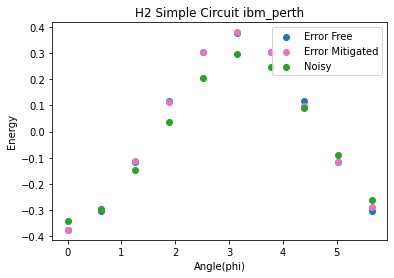

In [11]:
plt.scatter(angles, efs, c = 'tab:blue', label = 'Error Free')
plt.scatter(angles, ems, c = 'tab:pink', label = 'Error Mitigated')
plt.scatter(angles, ns, c = 'tab:green', label = 'Noisy')
plt.xlabel('Angle(phi)')
plt.ylabel('Energy')
plt.title('H2 Simple Circuit ibm_perth')
plt.legend()

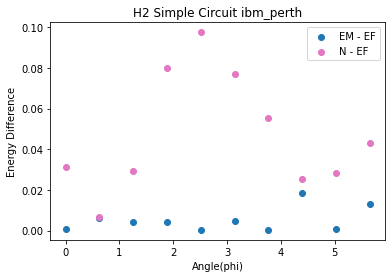

In [12]:
plt.scatter(angles, np.abs(np.array(ems) - np.array(efs)), c = 'tab:blue', label = 'EM - EF')
plt.scatter(angles, np.abs(np.array(ns) - np.array(efs)), c = 'tab:pink', label = 'N - EF')
plt.xlabel('Angle(phi)')
plt.ylabel('Energy Difference')
plt.title('H2 Simple Circuit ibm_perth')
plt.legend()

In [5]:
ansatz.draw()

┌───┐     ┌─────────┐┌───┐
q_0: ┤ H ├──■──┤ Rx(phi) ├┤ X ├
     └───┘┌─┴─┐└─────────┘└─┬─┘
q_1: ─────┤ X ├─────────────■──
          └───┘

In [13]:
q

(array([ 0.30702704, -0.2801892 , -0.30185831,  0.27479532,  0.00193872]),
 ['I', 'X', 'Y', 'Z', 'q0'])